In [3]:
import pandas as pd

data = pd.read_csv("/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv")

data.head()


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
X = data.drop("label", axis=1)

y = data["label"]

print("Features shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique labels (emotions):", y.unique())

Features shape: (2132, 2548)
Labels shape: (2132,)
Unique labels (emotions): ['NEGATIVE' 'NEUTRAL' 'POSITIVE']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression (Baseline Model)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
results = {}  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log, output_dict=True)

results["Logistic Regression"] = {
    "model": log_reg,
    "accuracy": accuracy_log,
    "report": report_log
}

# Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

results["Random Forest"] = {
    "model": rf_model,
    "accuracy": accuracy_rf,
    "report": report_rf
}

# K-Nearest Neighbors (KNN / Kth Nearest Algorithm)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

results["KNN"] = {
    "model": knn_model,
    "accuracy": accuracy_knn,
    "report": report_knn
}

(0.0, 1.05)

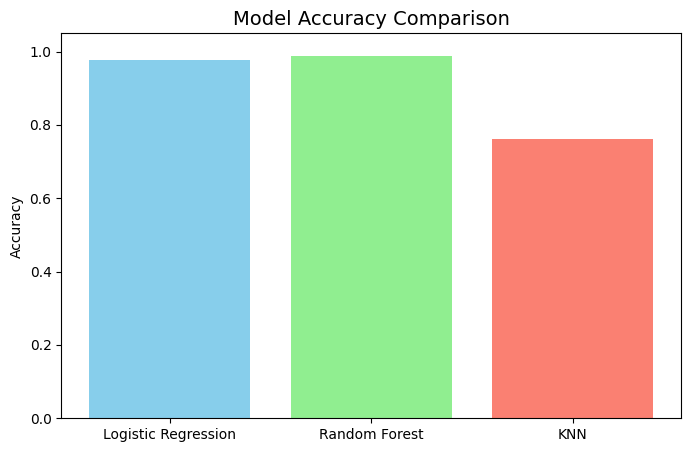

In [27]:
import matplotlib.pyplot as plt

table_data = []
for model_name, model_info in results.items():
    table_data.append({
        "Model": model_name,
        "Accuracy": model_info['accuracy']
    })

df = pd.DataFrame(table_data)

plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["Accuracy"], color=["skyblue", "lightgreen", "salmon"])
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)